# Import necessary library

In [1]:
pip install --upgrade pip

   ---------------------------------------- 2.1/2.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Input,MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

# Extract dataset

In [6]:
fldr=r"D:\Mamta\Age gender detector\UTKFace"

In [7]:
import os
files=os.listdir(fldr) #list of filenames in folder fldr

In [8]:
#create age,gender&image list to store values from each file
ages = []
genders = []
images = []

In [9]:

for file in files:
    age=int(file.split('_')[0]) #split the filename by delimeter"_" this
    gender=int(file.split('_')[1])
    image=cv2.imread(os.path.join(fldr,file)) #read image from file in folder by joining path
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #if we don't convert it shows bluish color by default for originalwe need to convert
    image=cv2.resize(image,(48,48))
    ages.append(age) # add age one by one in ages list
    genders.append(gender)
    images.append(image)
    

# View sample example

<function matplotlib.pyplot.show(close=None, block=None)>

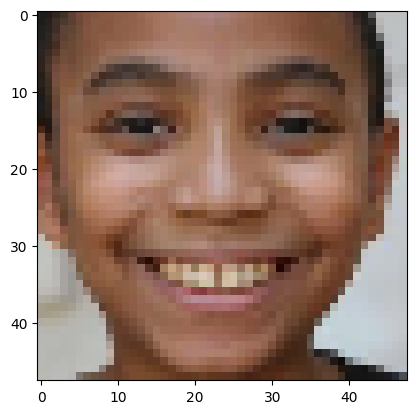

In [10]:
plt.imshow(images[87])
plt.show

In [11]:
print(ages[0])

100


# #Convert those list values into array which is more efficient to use for further computation

In [12]:
age_f=np.array(ages)
gender_f=np.array(genders)
image_f=np.array(images)

## Save those files in folder with .npy format as it is efficient for numpy

In [13]:
#np.save(os.path.join(fldr, 'age.npy'), age_f)
#np.save(os.path.join(fldr, 'gender.npy'), gender_f)
#np.save(os.path.join(fldr, 'image.npy'), image_f)

## Find no. of elements in dataset

In [14]:
values,counts=np.unique(gender_f,return_counts=True)
print(counts)

[12391 11317]


In [15]:
values,counts=np.unique(age_f,return_counts=True)
print(counts) 

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [17]:
label_f=np.array(labels)

In [18]:
len(labels)

23708

In [19]:
image_f_2=image_f/255

In [20]:
image_f_2

array([[[[0.82352941, 0.78823529, 0.76862745],
         [0.75294118, 0.71764706, 0.69019608],
         [0.57254902, 0.5372549 , 0.49803922],
         ...,
         [0.38823529, 0.39215686, 0.40392157],
         [0.35686275, 0.37647059, 0.38039216],
         [0.35686275, 0.37254902, 0.40392157]],

        [[0.82745098, 0.79215686, 0.77254902],
         [0.61176471, 0.57647059, 0.54901961],
         [0.55686275, 0.5254902 , 0.48235294],
         ...,
         [0.41960784, 0.42745098, 0.42352941],
         [0.38823529, 0.39215686, 0.40392157],
         [0.37254902, 0.37254902, 0.41176471]],

        [[0.79215686, 0.75686275, 0.7372549 ],
         [0.67058824, 0.63529412, 0.60784314],
         [0.62745098, 0.59607843, 0.55294118],
         ...,
         [0.55294118, 0.56078431, 0.54901961],
         [0.44313725, 0.44313725, 0.45490196],
         [0.4       , 0.39607843, 0.43529412]],

        ...,

        [[0.96862745, 0.96470588, 0.98823529],
         [0.94509804, 0.94117647, 0.96470588]

In [21]:
image_f_2.shape

(23708, 48, 48, 3)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(image_f_2,label_f,test_size=0.25)

In [24]:
y_train[0:5]

array([[64,  0],
       [80,  0],
       [60,  1],
       [45,  0],
       [44,  1]])

In [25]:
x_train[0:5]

array([[[[0.58431373, 0.45098039, 0.34901961],
         [0.64313725, 0.48235294, 0.37254902],
         [0.69803922, 0.50196078, 0.38039216],
         ...,
         [0.14117647, 0.2       , 0.31372549],
         [0.14509804, 0.2       , 0.31372549],
         [0.14509804, 0.2       , 0.31372549]],

        [[0.60392157, 0.47058824, 0.36470588],
         [0.62745098, 0.46666667, 0.35686275],
         [0.67058824, 0.4745098 , 0.35294118],
         ...,
         [0.1372549 , 0.19607843, 0.30196078],
         [0.14509804, 0.2       , 0.31372549],
         [0.14509804, 0.2       , 0.31372549]],

        [[0.63529412, 0.50196078, 0.4       ],
         [0.64705882, 0.48627451, 0.37647059],
         [0.6745098 , 0.47843137, 0.35686275],
         ...,
         [0.1372549 , 0.2       , 0.29803922],
         [0.14509804, 0.2       , 0.31372549],
         [0.14509804, 0.2       , 0.31372549]],

        ...,

        [[0.50980392, 0.34901961, 0.29803922],
         [0.56862745, 0.35686275, 0.24313725]

In [26]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [27]:
y_train_2[0][0:5]

array([0, 0, 1, 0, 1])

In [28]:
y_test_2[1][0:5]

array([52, 45, 26, 31, 26])

## Defining model

In [29]:
def Convulation(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [30]:
def model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Conv2D(64, (3, 3), activation='relu')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Conv2D(128, (3, 3), activation='relu')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Conv2D(256, (3, 3), activation='relu')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    return model

In [31]:
Model = model((48, 48, 3))

In [32]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 46, 46, 32)   896         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 23, 23, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 21, 21, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                              

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [34]:
file_s='Age_sex_detection.h5'
checkpoint=ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [35]:
History=Model.fit(x_train,y_train_2,batch_size=16,validation_data=(x_test,y_test_2),epochs=30,callbacks=callback_list)

Epoch 1/30
1111/1112 [============================>.] - ETA: 0s - loss: 15.8384 - sex_out_loss: 0.6862 - age_out_loss: 15.1522 - sex_out_accuracy: 0.5454 - age_out_accuracy: 0.0462
Epoch 1: val_loss improved from inf to 13.03775, saving model to Age_sex_detection.h5
1112/1112 [==============================] - 36s 30ms/step - loss: 15.8383 - sex_out_loss: 0.6862 - age_out_loss: 15.1522 - sex_out_accuracy: 0.5455 - age_out_accuracy: 0.0462 - val_loss: 13.0377 - val_sex_out_loss: 0.6090 - val_age_out_loss: 12.4288 - val_sex_out_accuracy: 0.6848 - val_age_out_accuracy: 0.0504
Epoch 2/30
1110/1112 [============================>.] - ETA: 0s - loss: 13.1525 - sex_out_loss: 0.6135 - age_out_loss: 12.5390 - sex_out_accuracy: 0.6709 - age_out_accuracy: 0.0463
Epoch 2: val_loss improved from 13.03775 to 11.64403, saving model to Age_sex_detection.h5
1112/1112 [==============================] - 33s 30ms/step - loss: 13.1477 - sex_out_loss: 0.6135 - age_out_loss: 12.5342 - sex_out_accuracy: 0.6708

In [36]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 2s 10ms/step - loss: 7.2181 - sex_out_loss: 0.3587 - age_out_loss: 6.8594 - sex_out_accuracy: 0.8515 - age_out_accuracy: 0.0462


[7.2181010246276855,
 0.358663409948349,
 6.859438419342041,
 0.8515269160270691,
 0.04622912034392357]

In [37]:
pred=Model.predict(x_test)

186/186 [==============================] - 2s 10ms/step


In [38]:
pred[1]

array([[48.487804],
       [38.410877],
       [17.005308],
       ...,
       [34.261032],
       [32.92853 ],
       [25.377539]], dtype=float32)

## Plotting Loss

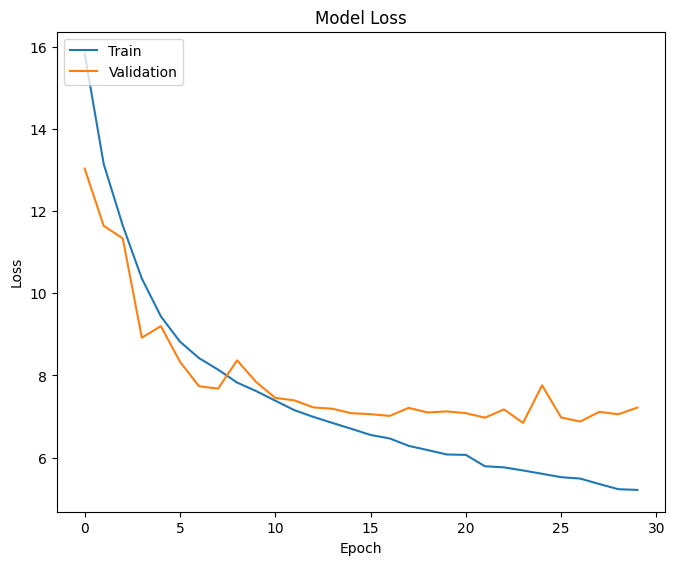

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting sex accuracy

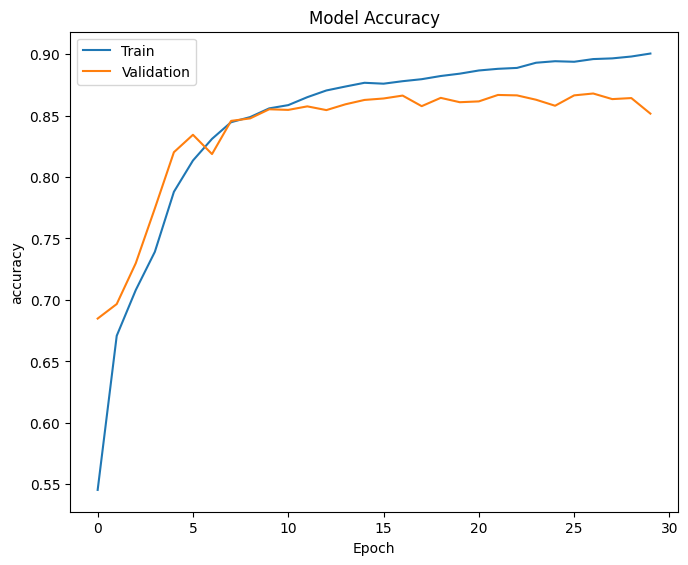

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

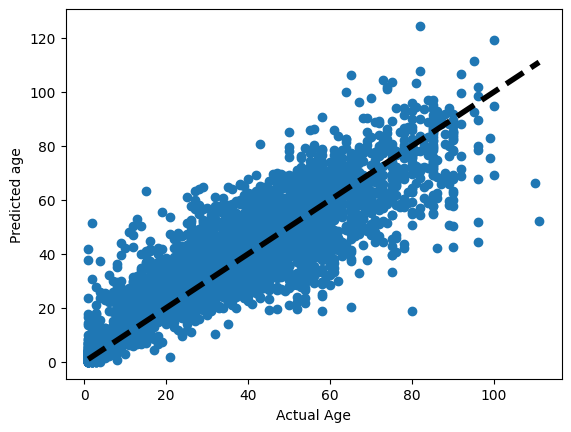

In [41]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted age')
plt.show()

## Making report of model

In [42]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
report=classification_report(y_test_2[0],Pred_l)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2976
           1       0.91      0.78      0.84      2951

    accuracy                           0.85      5927
   macro avg       0.86      0.85      0.85      5927
weighted avg       0.86      0.85      0.85      5927



## Making heatmap of model(gender only)

In [46]:
results=confusion_matrix(y_test_2[0],Pred_l)

<AxesSubplot:>

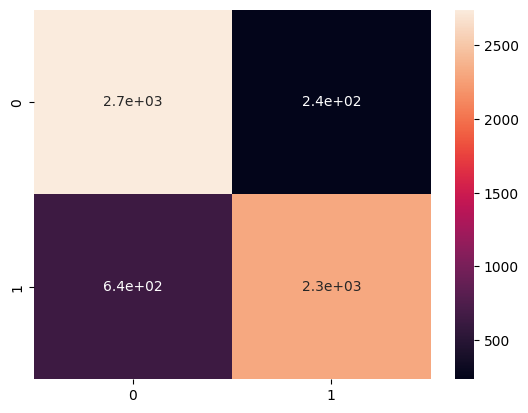

In [47]:
sns.heatmap(results,annot=True)

## Testing images ourselves

In [48]:
def test_image(ind,image_f,image_f_2,Model):
    plt.imshow(image_f[ind])
    image_test=image_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print('Predicted Age is '+ str(age))
    print('Predicted Gender is'+ sex_f[sex])

1/1 [==============================] - 0s 20ms/step
Predicted Age is 109
Predicted Gender isFemale


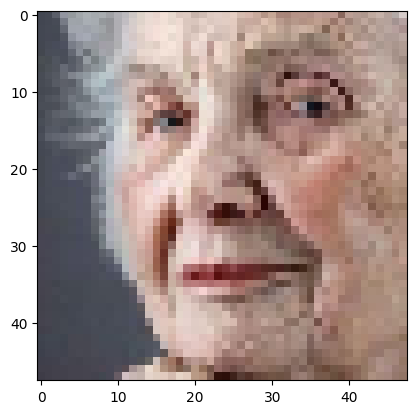

In [49]:
test_image(4,image_f,image_f_2,Model)